## B.1 Example 2.5

This is a python implementation of Example 2.5 from:    
Gawronski, W., "Advanced structural dynamics and active control of structures".
New York, NY: Springer New York, 2004.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from control import ss, impulse_response, bode
from active_control_of_structures.functions import modal2

In [2]:
# impulse responses and transfer functions

# Stiffness matrix
k1, k2, k3, k4 = 3, 3, 3, 0
k = np.array([[k1+k2, -k2, 0],
              [-k2, k2+k3, -k3],
              [0, -k3, k3+k4]])

# Mass matrix
m = np.diag([1, 1, 1])

# Damping matrix
damp = 0.01 * k

# State matrix
inv_m = np.linalg.inv(m)
k = inv_m @ k
damp = inv_m @ damp
a = np.block([[np.zeros((3,3)), np.eye(3)], [-k, -damp]])

# Input matrix
b = inv_m @ np.array([0, 0, 1]).T
b = np.concatenate([0*b, b]).reshape(6,1)

# Output matrix
c = np.array([0, 0, 0, 1, 0, 0])

# Feed-through matrix
d = np.array([0])

# Modal function
va, am, bm, cm = modal2(a, b, c) 

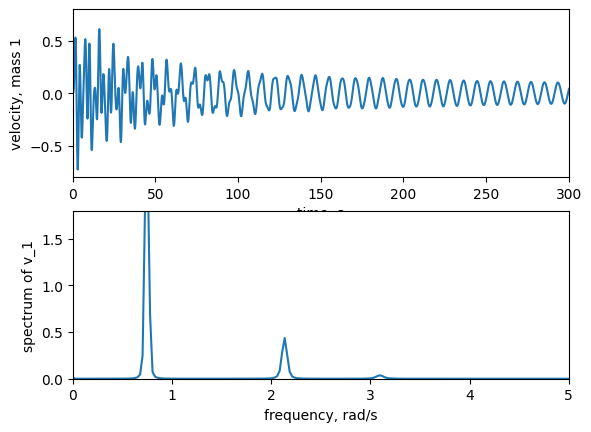

In [3]:
# Impulse response
dt = 0.1
t = np.arange(0, 1000, dt)
sys = ss(a, b, c, d)
T, y = impulse_response(sys, t)

# Plot the impulse response
fig, axs = plt.subplots(2, 1)
axs[0].plot(T, y)
axs[0].set(xlim=[0, 300], ylim=[-.8, .8], xlabel='time, s', ylabel='velocity, mass 1')

# Spectrum calculation
nn = len(t)
n = nn // 4
frequencies, p = welch(y, nperseg=n)
pp = np.sqrt(p)
fs_s = 1 / dt
f = fs_s * np.arange(n//2) / n
om = 2 * np.pi * f

# Plot the spectrum
axs[1].plot(om, pp[1:len(f)+1])
axs[1].set(xlabel='frequency, rad/s', ylabel='spectrum of v_1',
        xlim=[0, 5], ylim=[0, 1.8])

plt.show()

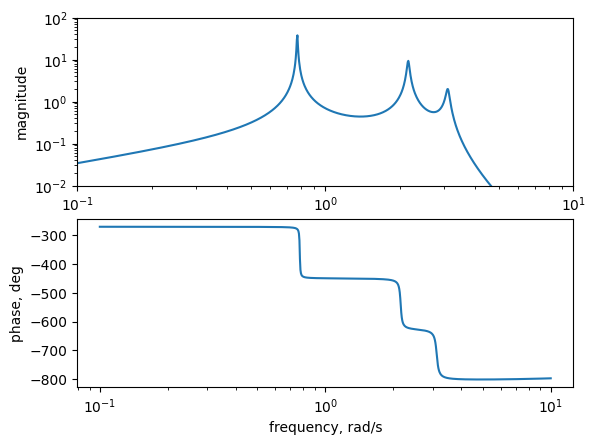

In [4]:
# Generate frequencies for Bode plot
w = np.logspace(-1, 1, 900)

# Calculate Bode plot
mag, phase, freq = bode(sys, w, dB=False, plot=False)

# Plot magnitude on a log-log scale
fig, axs = plt.subplots(2, 1)
axs[0].loglog(freq, mag)
axs[0].axis([0.1, 10, 0.01, 100])
axs[0].set(xlabel='frequency, rad/s', ylabel='magnitude')

# Plot phase on a semi-log scale
axs[1].semilogx(freq, np.rad2deg(phase))  # Convert phase to degrees
axs[1].set(xlabel='frequency, rad/s', ylabel='phase, deg')

plt.show()

In [5]:
# Single mode analysis
# Mode 1:
nn = [0, 1]
am1 = am[nn, :][:, nn]
bm1 = bm[nn, :]
cm1 = cm[nn]
sysm1 = ss(am1, bm1, cm1, d)
T, ym1 = impulse_response(sysm1, T=t)
mag1, phase1, _ = bode(sysm1, w, dB=False, plot=False)

# Mode 2:
nn = [2, 3]
am2 = am[nn, :][:, nn]
bm2 = bm[nn, :]
cm2 = cm[nn]
sysm2 = ss(am2, bm2, cm2, d)
T, ym2 = impulse_response(sysm2, T=t)
mag2, phase2, _ = bode(sysm2, w, dB=False, plot=False)

# Mode 3:
nn = [4, 5]
am3 = am[nn, :][:, nn]
bm3 = bm[nn, :]
cm3 = cm[nn]
sysm3 = ss(am3, bm3, cm3, d)
T, ym3 = impulse_response(sysm3, T=t)
mag3, phase3, _ = bode(sysm3, w, dB=False, plot=False)

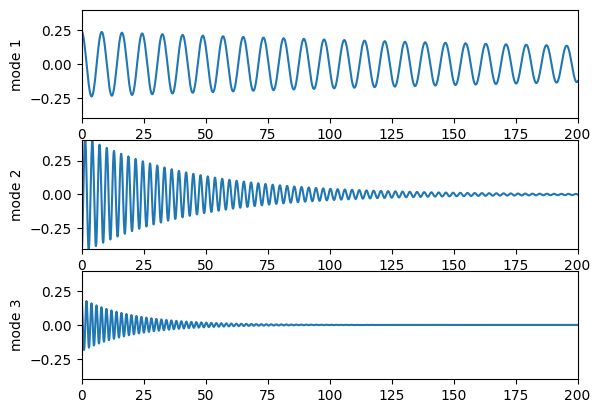

In [6]:
# Impulse responses of the single modes:
fig, axs = plt.subplots(3, 1)

for i, ym in enumerate([ym1, ym2, ym3]):
    axs[i].plot(t, ym)
    axs[i].set(xlim=[0, 200], ylim=[-.4, .4], ylabel=f'mode {i+1}')

plt.show()

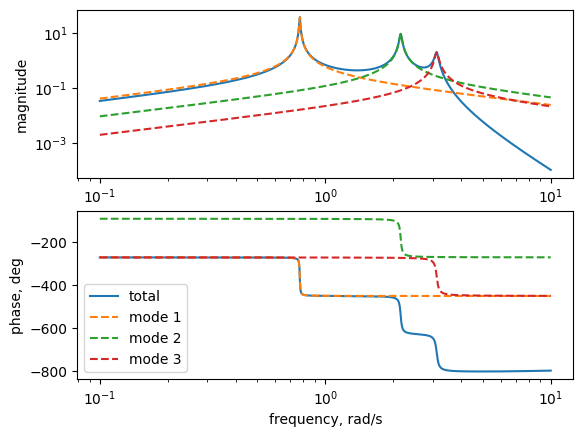

In [7]:
# Transfer functions of the single modes:
fig, axs = plt.subplots(2, 1)
axs[0].loglog(w, mag, w, mag1, '--', w, mag2, '--', w, mag3, '--')
axs[0].set(ylabel='magnitude')

axs[1].semilogx(w, np.rad2deg(phase), w, np.rad2deg(phase1), '--',
                w, np.rad2deg(phase2), '--', w, np.rad2deg(phase3), '--')
axs[1].set(xlabel='frequency, rad/s', ylabel='phase, deg')
axs[1].legend(['total', 'mode 1', 'mode 2', 'mode 3'])

plt.show()